# Number of Clusters

This experiment has the purpose of defining the number of clusters presented in the data. For that, we use the t-SNE for the projection of the data (dimensionality reduction), and an error metric to determine the best number of clusters. The metrics used are: square of the 2-norm distance metric, silhouette score and Davies-Bouldin Index. 

In this notebook we employed the **Silhouette score**. This metriccomputes how similar a sample is to its own cluster compared to other clusters. Its interval is [-1,1], where higher values indicate an appropriate configuration of the clusters.

Metrics such as adjusted rand index, mutual information based scores, homogeneity, completeness and V-measure can not be used in this work because they require the ground truth (true labels) of the data.

In [1]:
import sys
sys.path.append('../')
from src import reader as r
from src import visualization as v

In [2]:
import numpy as np
import sklearn
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score

In [3]:
X = r.readBOW()
print(X.head(10))
print(X.shape)

['health.txt', 'bags.csv', 'word2vec.csv']
     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9   ...    0.1185  0.1186  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   

   0.1187  0.1188  0.1189  0.1190  0.1191    0.1192  0.1193  0.1194  
0     0.0     0.0

In [15]:
from MulticoreTSNE import MulticoreTSNE as TSNE

smp_sz = 7000
tsne_bow = TSNE(n_components=2, perplexity=500, verbose=True)
tsne_bow_result = tsne_bow.fit_transform(X[:smp_sz])

## Silhouette Method --- K-means
This methods aims to define the best number of clusters (K) by the silhouette score.

In [11]:
silhouette = 0
Ks = []
Ss = []
Epsilon = 0.1
it = 1
J = 0.

k = 2
print("###############################")
while (silhouette < Epsilon):
    print("Number of Clusters:",k)
    print("Starting K-means++")
    cluster = KMeans(n_clusters=k,random_state=42)
    cluster_result = cluster.fit(X)
    print("Finished")    
    silhouette = silhouette_score(X,cluster_result.labels_)
    Ss.append(silhouette)
    print("avg silhouette of", silhouette)    
    Ks.append(k)
    k += 100
    it += 1
    print("###############################")
    
best_K = k-100
print("\nBest k:",best_K)
print("Number of iterations:",it)

###############################
Number of Clusters: 2
Starting K-means++
Finished
avg silhouette of 0.009018420993453593
###############################
Number of Clusters: 102
Starting K-means++
Finished
avg silhouette of 0.042121274476675345
###############################
Number of Clusters: 202
Starting K-means++
Finished
avg silhouette of 0.06694909171517145
###############################
Number of Clusters: 302
Starting K-means++
Finished
avg silhouette of 0.06930382070292725
###############################
Number of Clusters: 402
Starting K-means++
Finished
avg silhouette of 0.07673106694722753
###############################
Number of Clusters: 502
Starting K-means++
Finished
avg silhouette of 0.08532542189782757
###############################
Number of Clusters: 602
Starting K-means++
Finished
avg silhouette of 0.08964681500176115
###############################
Number of Clusters: 702
Starting K-means++
Finished
avg silhouette of 0.09493384855756366
########################

In [12]:
print("#############################")
print("Best K =", best_K)
print("Applying K-means")
best_cluster = KMeans(n_clusters=best_K)
best_cluster_result = best_cluster.fit(X)
print("Finished")
print("#############################")

#############################
Best K = 802
Applying K-means
Finished
#############################


In [13]:
true_label = cluster_result.labels_

<module 'matplotlib.pyplot' from '/home/azael/Trabalhos/MO444/MO444/lib/python3.5/site-packages/matplotlib/pyplot.py'>

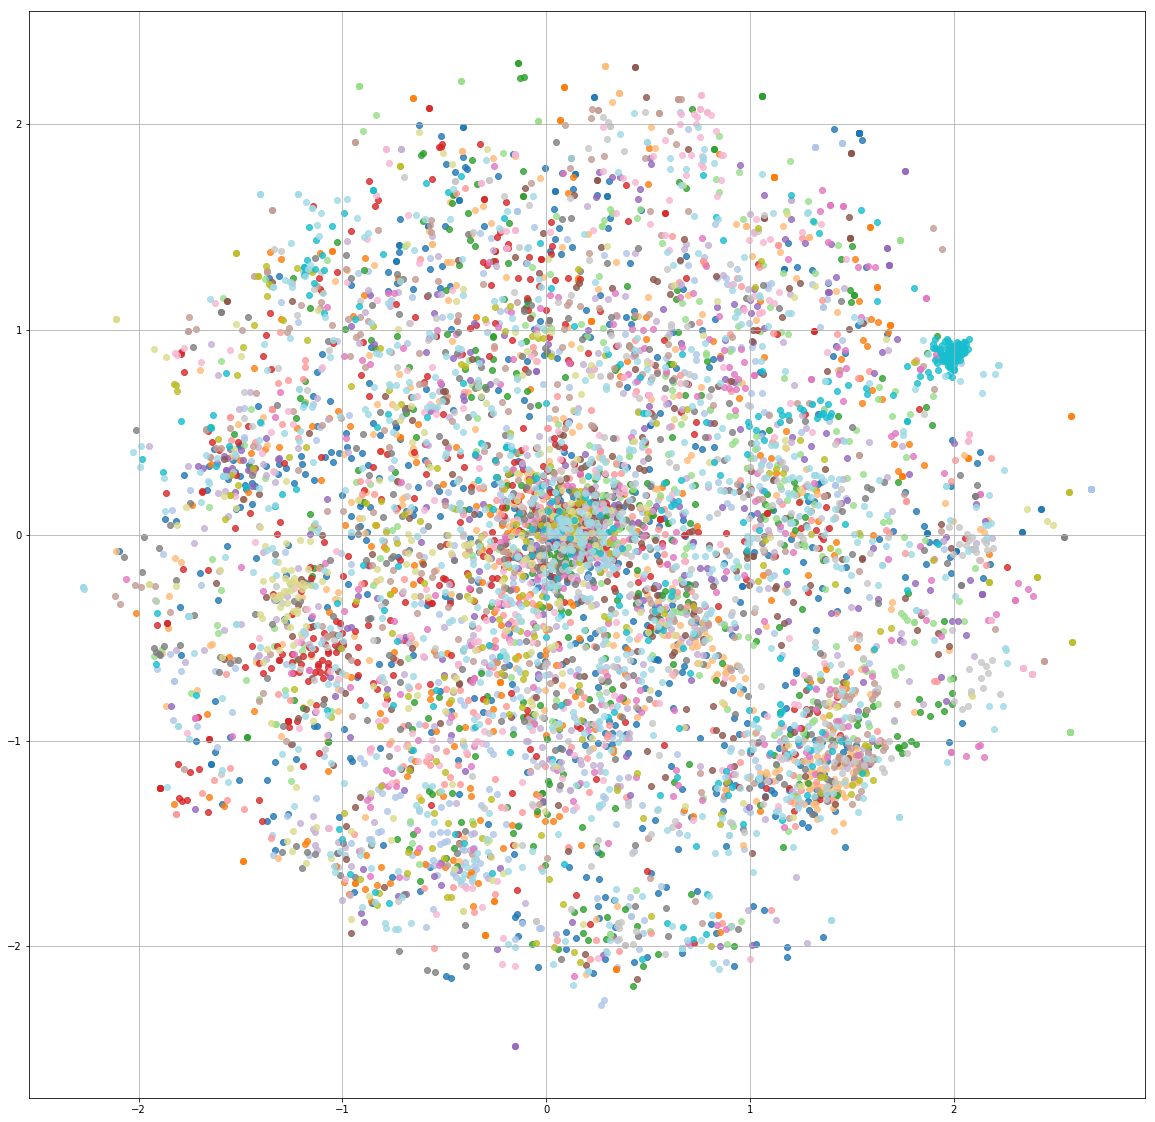

In [14]:
v.visualize_sup_scatter(tsne_bow_result, true_label[:smp_sz])